# 1. 📂  Завантаження та попередній огляд даних

In [2]:
import kagglehub
import pandas as pd

# Завантажуємо датасет локально
path = kagglehub.dataset_download("laotse/credit-risk-dataset")

# Читаємо CSV
df = pd.read_csv(f"{path}/credit_risk_dataset.csv")

/Users/vladromaniuk/Desktop/BankScore/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### 1️ 📂 Попередній огляд
Ми завантажили дані та переглянули їхню структуру: кількість рядків/стовпців, типи змінних, перші значення.
<br><br><br><br><br><br>

# 2. 🧹 Перевірка якості даних

In [5]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nОпис статистики:")
display(df.describe(include="all"))

Shape: (32581, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [6]:
# Пропуски
print("\nКількість пропусків по колонках:")
print(df.isnull().sum())


Кількість пропусків по колонках:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [7]:
# Дублікатів
print("\nКількість дублікатів:", df.duplicated().sum())


Кількість дублікатів: 165


# 2. 🧹 Перевірка якості даних: 
- 🔎 Перевірили пропуски та дублікати.
- ⚠️ Важливо врахувати перед моделюванням.
<br><br><br><br><br><br>

# 3. 📋 Опис змінних

### 👤 Персональні характеристики

* person_age – вік позичальника (роки). \
* person_income – річний дохід позичальника (у грошових одиницях).\
* person_home_ownership – статус володіння житлом (RENT, OWN, MORTGAGE, OTHER).\
* person_emp_length – стаж роботи (у роках).

### 💳 Інформація про кредит

* loan_intent – мета кредиту (EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION, HOMEIMPROVEMENT).\
* loan_grade – кредитний рейтинг позичальника (від A – найкращий до G – найгірший).\
* loan_amnt – сума кредиту.\
* loan_int_rate – процентна ставка за кредитом (%).\
* loan_percent_income – частка кредиту від доходу (loan_amnt / person_income).\

### 🏦 Кредитна історія

* cb_person_default_on_file – чи був позичальник у дефолті раніше (Y/N).\
* cb_person_cred_hist_length – довжина кредитної історії (роки).

### 🎯 Цільова змінна
* loan_status – статус кредиту (1 – виплачений, 0 – дефолт (не виплачений)).\
<br><br><br><br><br><br>

# 4. 📊 Розподіл цільової змінної

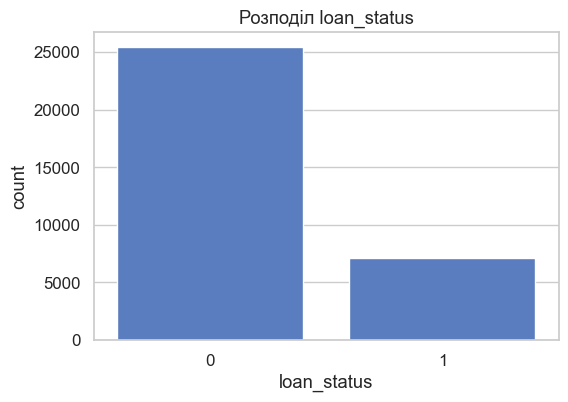

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title("Розподіл loan_status")
plt.show()


#### 4. 📊 Висновок: 
* Графік показує частичний дисбаланс класів у змінній **loan_status**.
<br><br><br><br><br><br>

# 5. 🔢 Числові змінні (детально)

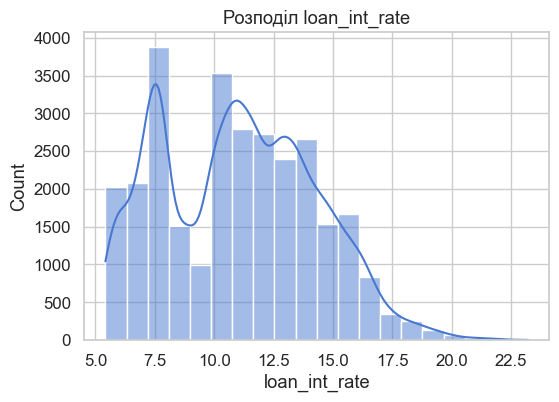

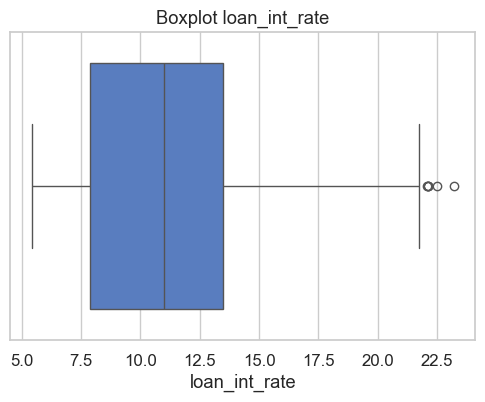

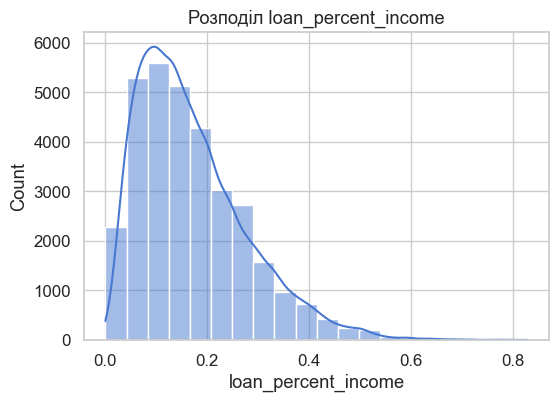

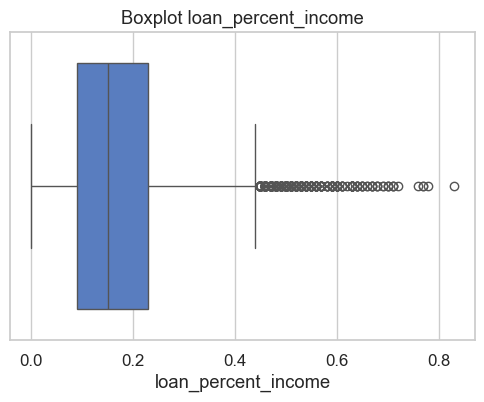

In [9]:
cols = ['loan_int_rate', 'loan_percent_income', ]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=20, kde=True)
    plt.title(f"Розподіл {col}")
    plt.show()
    
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()


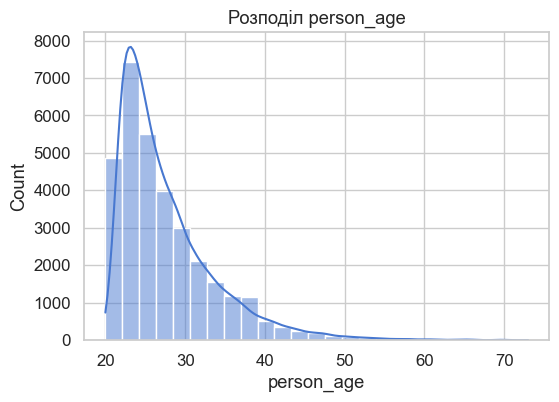

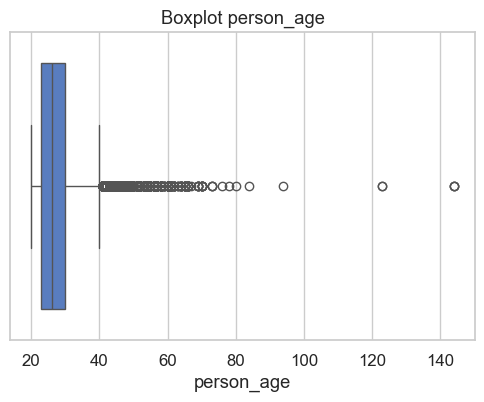

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df[df['person_age'] < 75]['person_age'], bins=25, kde=True)
plt.title("Розподіл person_age")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['person_age'])
plt.title("Boxplot person_age")
plt.show()

In [11]:
print("Мінімальне значення person_age:", df['person_age'].min())
print("Середнє значення person_age:", df['person_age'].mean())
print("Максимальне значення person_age:", df['person_age'].max())

Мінімальне значення person_age: 20
Середнє значення person_age: 27.73459992019889
Максимальне значення person_age: 144


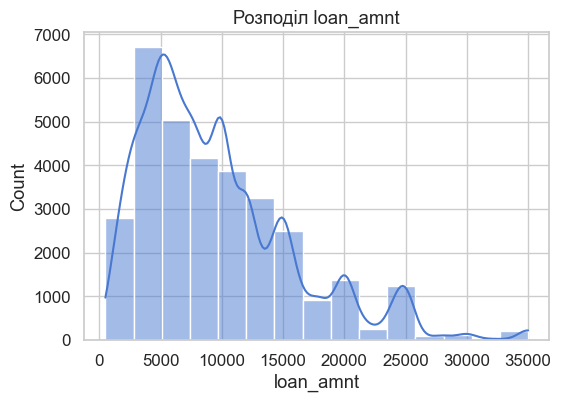

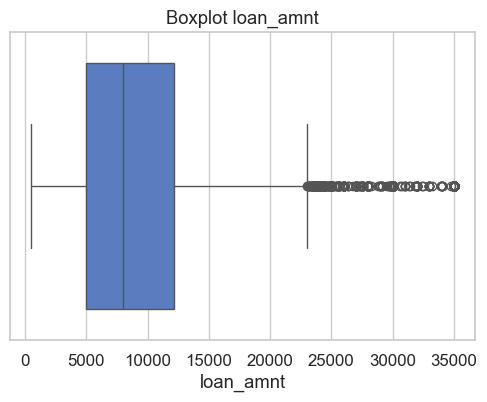

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['loan_amnt'].dropna(), bins=15, kde=True)  # змінюй bins окремо
plt.title("Розподіл loan_amnt")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['loan_amnt'])
plt.title("Boxplot loan_amnt")
plt.show()


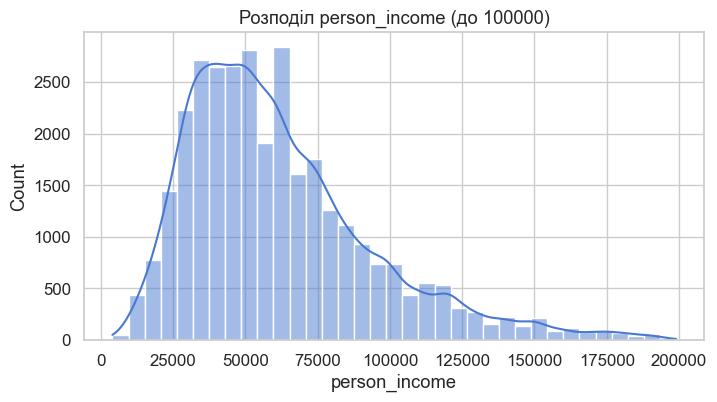

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['person_income'] < 200000]['person_income'], bins=35, kde=True)
plt.title("Розподіл person_income (до 100000)")
plt.xlabel("person_income")
plt.show()


In [14]:
print("Мінімальне значення person_income:", df['person_income'].min())
print("Середнє значення person_income:", df['person_income'].mean())
print("Максимальне значення person_income:", df['person_income'].max())


Мінімальне значення person_income: 4000
Середнє значення person_income: 66074.84846996715
Максимальне значення person_income: 6000000


## 5️ Числові змінні (детально)
- 📈 Побудовано розподіли та boxplots для ключових числових змінних
- 🧮 Виведені мінімальні, середні та максимальні значення для **age** та **income**
- ⚖️ Це дозволяє краще зрозуміти масштаби даних та потенційні викиди
<br><br><br><br><br><br>

# 6. 🏷️ Категоріальні змінні

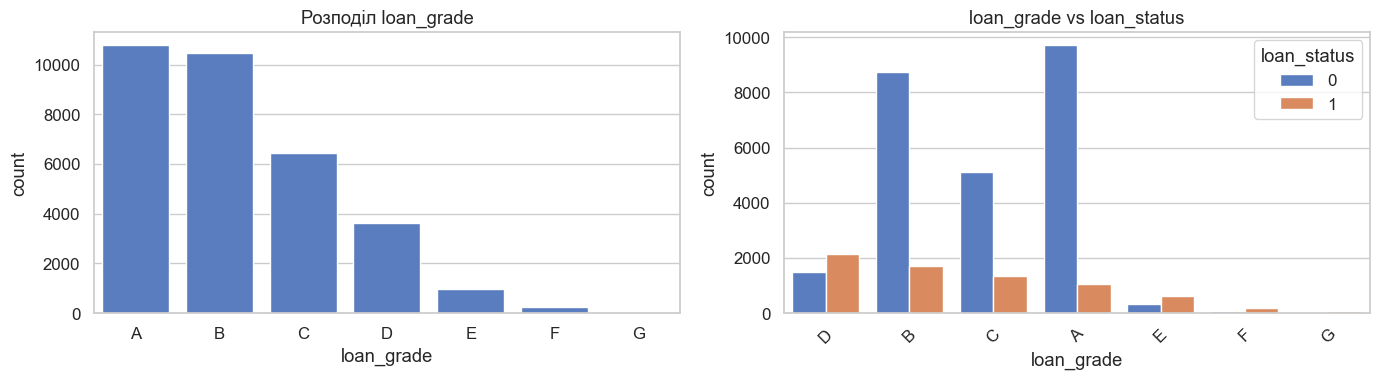

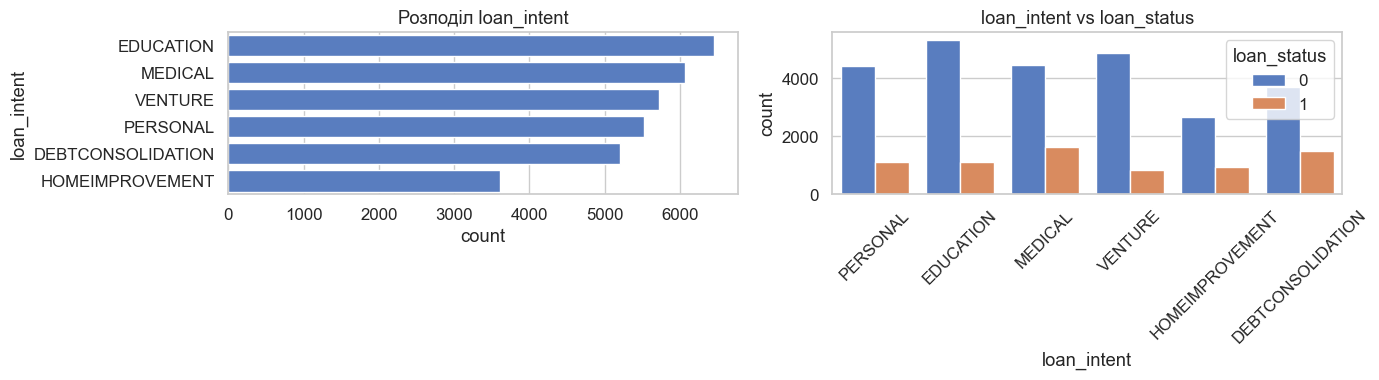

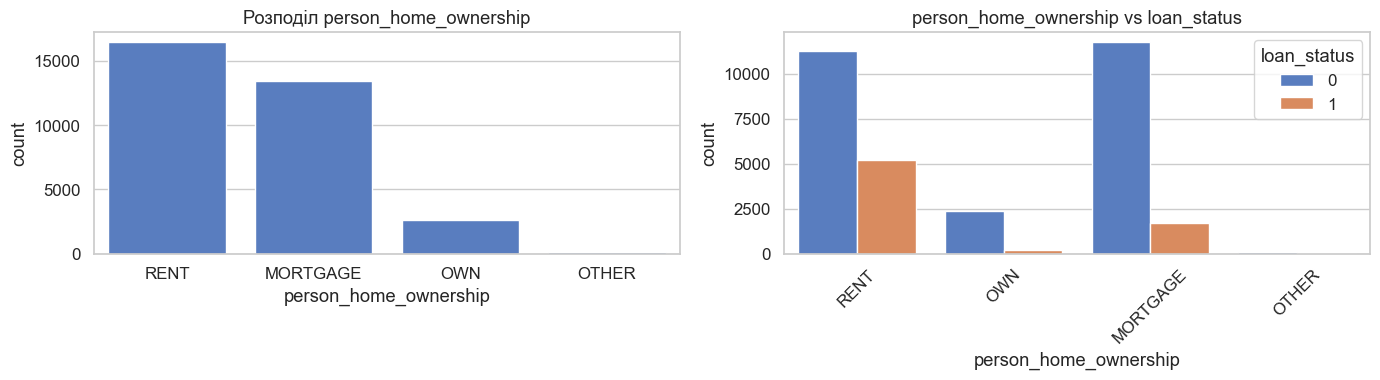

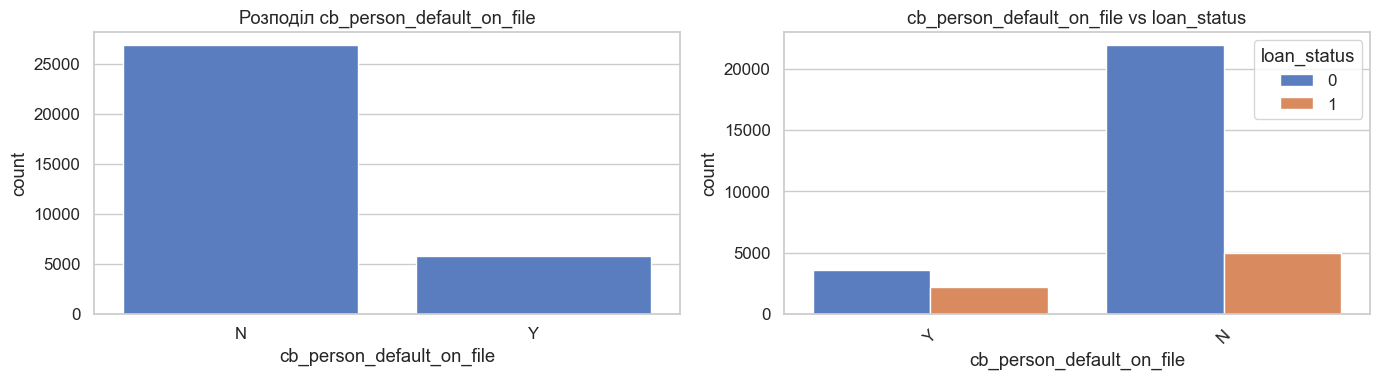

In [15]:
cat_cols = ['loan_grade', 'loan_intent', 'person_home_ownership', 'cb_person_default_on_file']

for col in cat_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    
    # 1. Загальний розподіл
    if df[col].str.len().max() < 10:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[0])
        axes[0].tick_params(axis='x', rotation=0)
    else:
        sns.countplot(y=col, data=df, order=df[col].value_counts().index, ax=axes[0])
    
    axes[0].set_title(f"Розподіл {col}")
    
    # 2. Розподіл по loan_status
    sns.countplot(x=col, hue='loan_status', data=df, ax=axes[1])
    axes[1].set_title(f"{col} vs loan_status")
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


In [16]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

## 6️. Категоріальні змінні. 
Для кожної категоріальної змінної показано:
- 📊 Загальний розподіл
- 🎯 Залежність від **loan_status**
<br><br><br><br><br><br>

# 7. 📦 Числові змінні проти loan_status

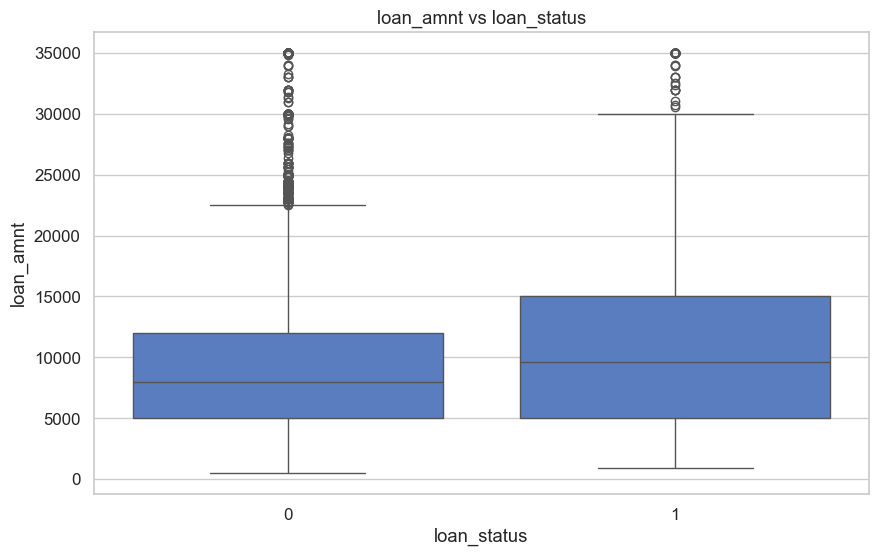

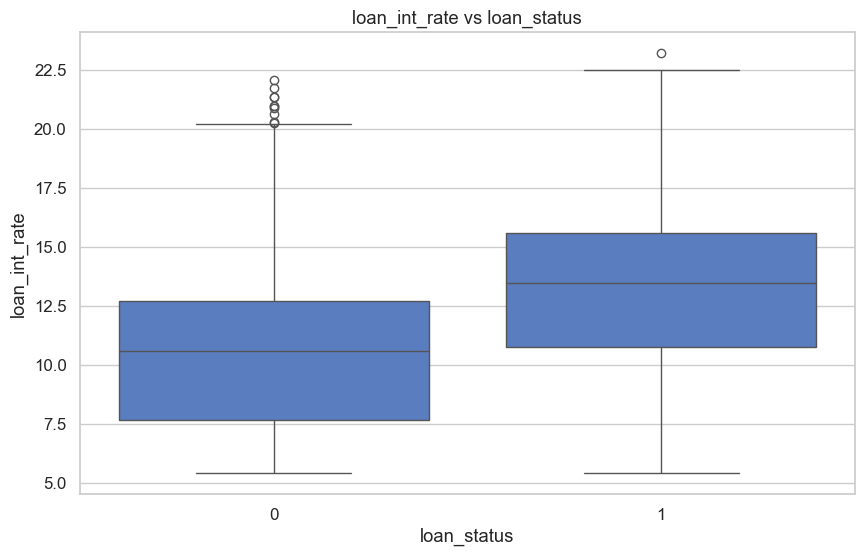

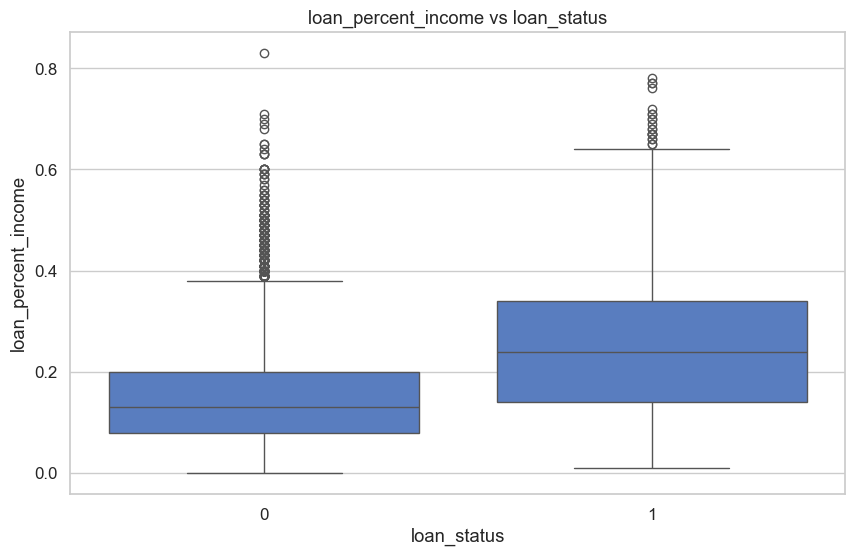

In [17]:
num_cols_smaller = ['loan_amnt', 'loan_int_rate', 'loan_percent_income']

for col in num_cols_smaller:
    plt.figure(figsize=(10,6))  # нова фігура для кожного графіка
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs loan_status")
    plt.show()


## 7️. Залежності числових змінних від цільової
- 📦 Boxplots показують розподіл кредитних характеристик по класах **loan_status**
<br><br><br><br><br><br>

# 8. 🔗 Кореляційна матриця

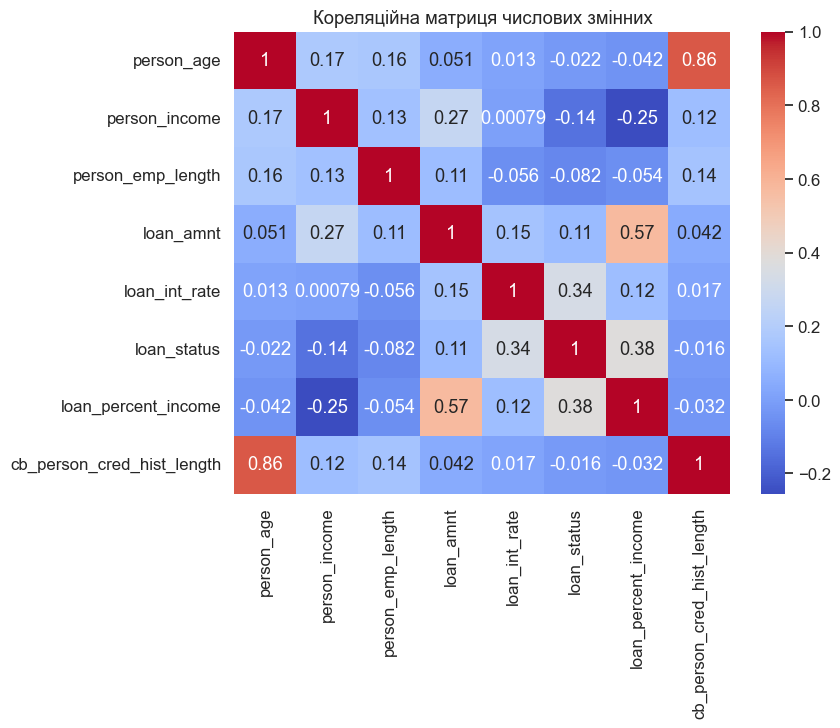

In [18]:
num_cols = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_status',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця числових змінних")
plt.show()


## 8️. Кореляції
- 🔗 Теплова карта показує взаємозв’язки між числовими змінними
<br><br><br><br><br><br>

# 9. 📌 Підсумки

In [23]:
summary = pd.DataFrame({
    'Кількість рядків': [df.shape[0]],
    'Кількість стовпців': [df.shape[1]],
    'Пропуски (загалом)': [df.isnull().sum().sum()],
    'Дублікатів': [df.duplicated().sum()],
    'Числових змінних': [len(num_cols)],
    'Категоріальних змінних': [len(cat_cols)]
})

summary

,Кількість рядків,Кількість стовпців,Пропуски (загалом),Дублікатів,Числових змінних,Категоріальних змінних
0,32581,12,4011,165,8,4


## 9️ Висновки EDA
1. 📂 Дослідили структуру даних, пропуски, дублікати
2. 🎯 Побудували розподіли цільової змінної
3. 🔢 Детально проаналізували числові змінні
4. 🏷️ Проаналізували категоріальні змінні
5. 📦 Оцінили залежності між числовими змінними та loan_status
6. 🔗 Побудували кореляційну матрицю
<br><br>

In [25]:
from IPython.display import Markdown

display(Markdown(summary))



### 📊 Загальні метрики датасету
| Метрика | Значення |
|---------|-----------|
| Кількість рядків | 32581 |
| Кількість стовпців | 12 |
| Пропуски (загалом) | 4011 |
| Дублікатів | 165 |
| Числових змінних | 8 |
| Категоріальних змінних | 4 |
